# Problem: Predict the success or faire of an application.

@author: Talardia Gbangou, October 2022

We want to describe and predict the succes or failure of application. Thus, we have a classification.

In [529]:
from platform import python_version
print("python version is:",python_version())

python version is: 3.9.7



# 1. Descriptives statistics
Here some exploratory data analysis is performed to undertand the data and make the first conclusion on features selection for the prediction

1.1. Data description

* importing relevent libraries
* load dataset
* checking influence of some features on the target or depedent variable
* checking wether we have balanced or imbalance dataset
* find and treatting missing dataset
* converting categorical data
1.2. Significance test: we will use several stattistical tests techniiques dependending the variables considered:
* a) for significance test between two categorical nominal variables we used CHI-SQUARE test
* b) for significance test between a categorical and numerical variable, we used anova test
* c) for significance test between two numerical variables we used ttest

## 1.1. Data description

In [530]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [531]:
df = pd.read_csv("/home/hp/AI_project/quantmetry/data_v1.0.csv",parse_dates=['date'], sep=",") #date objet is converted to date format

In [532]:
df.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


Le jeu de données comporte 11 colonnes :
* date – date de la candidature
*  age – âge du candidat
*  diplome – plus haut diplôme obtenu (bac, licence, master, doctorat)
*  specialite – spécialité du diplôme (géologie, forage, détective, archéologie, . . . )
*  salaire – salaire demandé
*  dispo – oui : disponibilité immédiate, non : pas disponible immédiatement
*  sexe – féminin (F) ou masculin (M)
*  exp – nombre d’années d’expérience
*  cheveux – couleur des cheveux (châtain, brun, blond, roux)
* note – note (sur 100) obtenue à l’exercice de recherche d’or
*  embauche – le candidat a-t-il été embauché ? (0 : non, 1 : oui)

* Checking the influence of numeric features (age, salaire, exp, et note) on target feature:

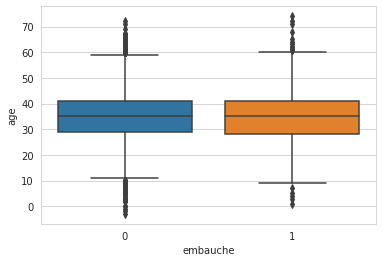

In [533]:
sns.boxplot(y="age",x="embauche",data=df)
plt.show()

In [534]:
df[df.embauche==1].age.describe()

count    2282.000000
mean       34.694128
std         9.742329
min         1.000000
25%        28.000000
50%        35.000000
75%        41.000000
max        74.000000
Name: age, dtype: float64

In [535]:
df[df.embauche==0].age.describe()

count    17627.000000
mean        35.044704
std          9.591340
min         -3.000000
25%         29.000000
50%         35.000000
75%         41.000000
max         72.000000
Name: age, dtype: float64

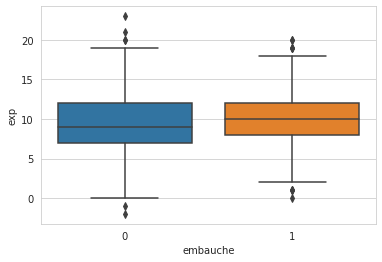

In [536]:
sns.boxplot(y="exp",x="embauche",data=df)
plt.show()

* Succesful candidate tend to have more experience than the unsuccesful ones (les candidats retenus on en moyenne plus d'experience que ceux qui ne sont pas)

In [537]:
df[df.embauche==1].exp.describe()

count    2284.000000
mean        9.555604
std         2.958165
min         0.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        20.000000
Name: exp, dtype: float64

In [538]:
df[df.embauche==0].exp.describe()

count    17620.00000
mean         9.49319
std          3.01904
min         -2.00000
25%          7.00000
50%          9.00000
75%         12.00000
max         23.00000
Name: exp, dtype: float64

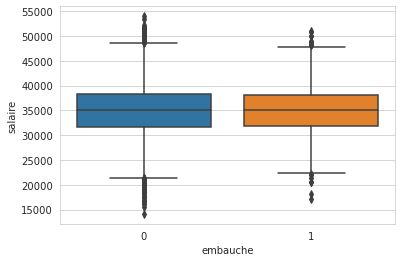

In [539]:
sns.boxplot(y="salaire",x="embauche",data=df)
plt.show()

In [540]:
df[df.embauche==1].salaire.describe()

count     2285.000000
mean     35006.883151
std       4620.512606
min      17047.000000
25%      31807.000000
50%      34996.000000
75%      38191.000000
max      51093.000000
Name: salaire, dtype: float64

In [541]:
df[df.embauche==0].salaire.describe()

count    17620.000000
mean     34970.124177
std       5050.699185
min      14128.000000
25%      31560.500000
50%      34976.000000
75%      38378.000000
max      53977.000000
Name: salaire, dtype: float64

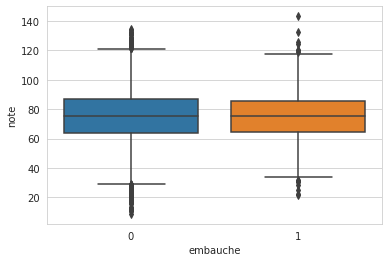

In [542]:
sns.boxplot(y="note",x="embauche",data=df)
plt.show()

In [543]:
df[df.embauche==1].note.describe()

count    2276.000000
mean       75.312329
std        15.993070
min        21.260000
25%        64.265000
50%        75.110000
75%        85.820000
max       143.220000
Name: note, dtype: float64

In [544]:
df[df.embauche==0].note.describe()

count    17610.000000
mean        75.150207
std         17.233657
min          8.680000
25%         63.570000
50%         75.070000
75%         86.700000
max        134.450000
Name: note, dtype: float64

* Checking the influence of numeric features (age, salaire, exp, et note) on target feature:

<AxesSubplot:xlabel='embauche', ylabel='count'>

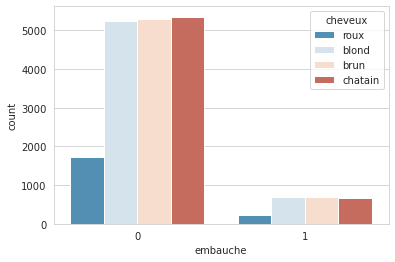

In [545]:
sns.set_style('whitegrid')
sns.countplot(x='embauche',hue='cheveux',data=df,palette='RdBu_r')

On note plus de candidatures de personnes aux cheveux blond,brun et chatain.

<AxesSubplot:xlabel='embauche', ylabel='count'>

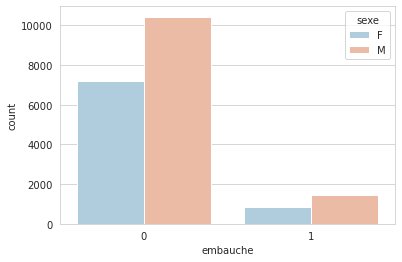

In [546]:
sns.set_style('whitegrid')
sns.countplot(x='embauche',hue='sexe',data=df,palette='RdBu_r')

On note plus de candidatures d'homme que de femme.

<AxesSubplot:xlabel='embauche', ylabel='count'>

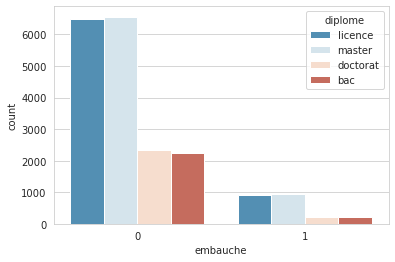

In [547]:
sns.set_style('whitegrid')
sns.countplot(x='embauche',hue='diplome',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='embauche', ylabel='count'>

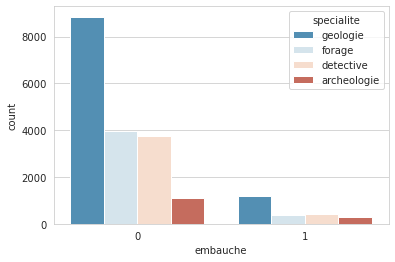

In [548]:
sns.set_style('whitegrid')
sns.countplot(x='embauche',hue='specialite',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='embauche', ylabel='count'>

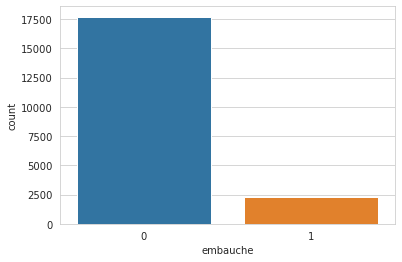

In [549]:
sns.set_style('whitegrid')
sns.countplot(x='embauche',data=df)

In [550]:
df_percentage = pd.DataFrame(df.embauche.value_counts())
df_percentage['Percentage (%)'] = (df_percentage['embauche']/df_percentage['embauche'].sum())*100
df_percentage

,embauche,Percentage (%)
0,17708,88.54
1,2292,11.46


Conclusion:
* We have very unbalanced data here with only about 11% in the positive class (i.e. succesful application). We will have to deal with this when training data to assess the performance of the model. This can be done by undersampling,oversampling, adjusting class weights in models, or possibly look at more than one of these to get the best result. We also need to chose adequate performance metric (like F-score that combine precision-recall or ranking metric such as ROC AUC) .

## 1.2. Significance test

### 1.2.1. Treating missing values before significance test

* Finding and treating missing data: Let's check if there is are missing data
* Removing features that are not need for building the machine learning model
* creating a data cleaning function

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  20000 non-null  int64         
 1   index       20000 non-null  int64         
 2   date        19909 non-null  datetime64[ns]
 3   cheveux     19897 non-null  object        
 4   age         19909 non-null  float64       
 5   exp         19904 non-null  float64       
 6   salaire     19905 non-null  float64       
 7   sexe        19900 non-null  object        
 8   diplome     19890 non-null  object        
 9   specialite  19907 non-null  object        
 10  note        19886 non-null  float64       
 11  dispo       19894 non-null  object        
 12  embauche    20000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [552]:
df=df.replace("?",np.NaN)

In [553]:
df.isnull().sum() #cehcking missing before cleaning

Unnamed: 0      0
index           0
date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

In [554]:
df.columns

Index(['Unnamed: 0', 'index', 'date', 'cheveux', 'age', 'exp', 'salaire',
       'sexe', 'diplome', 'specialite', 'note', 'dispo', 'embauche'],
      dtype='object')

* Removing features that are not need for building the machine learning model

In [555]:
df=df.drop(columns=["index","Unnamed: 0","date"])

In [556]:
df.columns

Index(['cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome', 'specialite',
       'note', 'dispo', 'embauche'],
      dtype='object')

* creating a data cleaning function:

In [557]:
def clean(data):
    cols_nume = ["age","exp","salaire","note"] #list of quantitative variables to be treated
    for col in cols_nume:
        data[col].fillna(data[col].median(), inplace=True) #filling missing values of quantitative variable with mean
    cols_cate = ["cheveux","sexe","diplome","specialite","dispo"] #list of quantitative variables
    for col in cols_cate:
        data[col].fillna("U", inplace=True) #filling missing value of categorical variables with unknown value 'U' 
    return data

In [558]:
df = clean(df)
df.isnull().sum() #cehcking missing after cleaning

cheveux       0
age           0
exp           0
salaire       0
sexe          0
diplome       0
specialite    0
note          0
dispo         0
embauche      0
dtype: int64

### 1.2.2. Statistical significance
* Ho (null hypothesis): There is no difference between the two features
* H1 (alternative hypothesis): There is difference between the two features
* confidence interval : 95%

* a) Significance test between specialite and sexe is a non-parametric test: we have two categorical nominal variables, thus we will use CHI-SQUARE test.

In [559]:
import scipy.stats as stats

In [560]:
dataset_table=pd.crosstab(df['specialite'],df['sexe'])
print(dataset_table)

sexe            F     M   U
specialite                 
U              41    50   2
archeologie  1081   298   5
detective    2522  1614  19
forage       1964  2351  25
geologie     2403  7576  49


In [561]:
dataset_table.values 

array([[  41,   50,    2],
       [1081,  298,    5],
       [2522, 1614,   19],
       [1964, 2351,   25],
       [2403, 7576,   49]])

In [562]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[  41   50    2]
 [1081  298    5]
 [2522 1614   19]
 [1964 2351   25]
 [2403 7576   49]]


In [563]:
val=stats.chi2_contingency(dataset_table)
val

(2716.1402312337027,
 0.0,
 8,
 array([[3.72511500e+01, 5.52838500e+01, 4.65000000e-01],
        [5.54361200e+02, 8.22718800e+02, 6.92000000e+00],
        [1.66428525e+03, 2.46993975e+03, 2.07750000e+01],
        [1.73838700e+03, 2.57991300e+03, 2.17000000e+01],
        [4.01671540e+03, 5.96114460e+03, 5.01400000e+01]]))

In [564]:
Expected_Values=val[3]
Expected_Values

array([[3.72511500e+01, 5.52838500e+01, 4.65000000e-01],
       [5.54361200e+02, 8.22718800e+02, 6.92000000e+00],
       [1.66428525e+03, 2.46993975e+03, 2.07750000e+01],
       [1.73838700e+03, 2.57991300e+03, 2.17000000e+01],
       [4.01671540e+03, 5.96114460e+03, 5.01400000e+01]])

In [565]:
no_of_rows=len(dataset_table.iloc[0:5,0])
no_of_columns=len(dataset_table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 8


In [566]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]+chi_square[2]

In [567]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 2716.140231233703


In [568]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 15.50731305586545


In [569]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  8
p-value: 0.0


In [570]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


* b) Significance test between 'cheveux' and 'salaire' is a non-parametric test: here we have a categorical variable (with more than 2 categories) and a numerical variable,therefore we will use Anova test which is suitable.

In [571]:
df_anova = df[['cheveux','salaire']]
grps = pd.unique(df_anova.cheveux.values)
grps

array(['roux', 'blond', 'brun', 'chatain', 'U'], dtype=object)

In [572]:
d_data = {grp:df_anova['salaire'][df_anova.cheveux == grp] for grp in grps}
d_data

{'roux': 0        26803.0
 4        28533.0
 7        42392.0
 14       33882.0
 51       34962.0
           ...   
 19970    28761.0
 19972    37454.0
 19985    28549.0
 19988    34077.0
 19995    35723.0
 Name: salaire, Length: 1955, dtype: float64,
 'blond': 1        38166.0
 2        35207.0
 11       38719.0
 17       41512.0
 18       30359.0
           ...   
 19986    35678.0
 19987    35353.0
 19989    40685.0
 19993    33520.0
 19994    32674.0
 Name: salaire, Length: 5929, dtype: float64,
 'brun': 3        32442.0
 6        39476.0
 10       38516.0
 12       28688.0
 13       30822.0
           ...   
 19978    36303.0
 19981    31213.0
 19990    39591.0
 19992    41107.0
 19999    44499.0
 Name: salaire, Length: 5991, dtype: float64,
 'chatain': 5        38558.0
 8        28625.0
 9        32454.0
 19       28956.0
 21       39069.0
           ...   
 19984    35803.0
 19991    41512.0
 19996    33570.0
 19997    33751.0
 19998    34167.0
 Name: salaire, Length: 6022, dtyp

In [573]:
F, p = stats.f_oneway(d_data['roux'], d_data['blond'],d_data['brun'],d_data['chatain'],d_data['U'])

In [574]:
print(p)

2.8070755308370037e-18


In [575]:
if p<0.05:
    print("reject null hypothesis, There is a relationship between 'cheveux' and 'salaire'")
else:
    print("accept null hypothesis , There is no relationship between 'cheveux' and 'salaire")

reject null hypothesis, There is a relationship between 'cheveux' and 'salaire'


* c) Significance test between 'exp' and 'note' variables  a parametric test (i.e. test beweent two numerical variables, we will use two-sample ttest)

In [576]:
df['exp'].mean()

9.49795

In [577]:
df['note'].mean()

75.16825599999972

In [578]:
_,p_value=stats.ttest_ind(a=df['exp'],b=df['note'],equal_var=False)

In [579]:
p_value

0.0

In [580]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis,there is a relationship between 'exp' and 'note'")
else:
    print("we are accepting null hypothesis,there is a relationship between 'exp' and 'note'")

 we are rejecting null hypothesis,there is a relationship between 'exp' and 'note'


### Conclusion: 
D' apres les analyses, il y' a bien une dépendance statistiquement significative (a 95% d' interval de confiance) entre :
(a) La spéecialité et le sexe,
(b) La couleur de cheveux et le salaire demandé, et
(c) Le nombre d’années d’expérience et la note à l’exercice


## Treating categorical variables as part of feature engineering :  
* We have nominal variables so we will perform one hot encoding (which is appropriate)

In [581]:
Cheveux = pd.get_dummies(df['cheveux'],drop_first=True)
Sexe = pd.get_dummies(df['sexe'],drop_first=True)
Diplome = pd.get_dummies(df['diplome'],drop_first=True)
Specialite = pd.get_dummies(df['specialite'],drop_first=True)
Dispo = pd.get_dummies(df['dispo'],drop_first=True)

In [582]:
df.drop(["cheveux","sexe","diplome","specialite","dispo"],axis=1,inplace=True)

In [583]:
df.head()

,age,exp,salaire,note,embauche
0,25.0,9.0,26803.0,97.08,0
1,35.0,13.0,38166.0,63.86,0
2,29.0,13.0,35207.0,78.50,0
3,35.0,12.0,32442.0,45.09,0
4,35.0,6.0,28533.0,81.91,0


In [584]:
df = pd.concat([df,Cheveux,Sexe,Diplome,Specialite,Dispo],axis=1)

In [585]:
df.head()

,age,exp,salaire,note,embauche,blond,brun,chatain,roux,M,...,bac,doctorat,licence,master,archeologie,detective,forage,geologie,non,oui
0,25.0,9.0,26803.0,97.08,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,35.0,13.0,38166.0,63.86,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,29.0,13.0,35207.0,78.50,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
3,35.0,12.0,32442.0,45.09,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,35.0,6.0,28533.0,81.91,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


# 2. Machine learning

* Randform forest is a popular supervised machine learning algorithm based on ensemble learning that we will use for our classification problem
* We did some tuning of the hyperparameter of the random forest model to treat the overfiting and to take into account the imbalanced dataset
* Confusion metric and F-score (combine precision-recall) are used in order to take into account the imbalanced dataset
* Feature importance with the random forest is also assessed

# 2.2. Building a machine learning model for prediction
* Randform forest is a popular supervised machine learning algorithm based on ensemble learning that we will use for our classification problem

In [586]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [587]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [588]:
from sklearn.model_selection import cross_validate

* Separation of independent and dependent variables

In [589]:
X=df.drop("embauche",axis=1) #features or independent variable
y=df["embauche"] #target or dependent variable

In [590]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=0)

Tuning the hyperparameter of the random forest model to take into account the imbalanced dataset.

In [591]:
params_grid_rf={
    'class_weight':['balanced'],
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt','log2'],
    'max_depth': [2, 5, 10],
    'criterion': ['gini','entropy']
}

In [592]:
rf_grid=GridSearchCV(RandomForestClassifier(random_state=0),params_grid_rf,scoring="accuracy",cv=5,verbose=1,n_jobs = 4)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [593]:
rf_grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [594]:
model_rf=rf_grid.best_estimator_

In [595]:
model_rf

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [596]:
y_train_pred_rf=model_rf.predict(X_train)
y_val_pred_rf=model_rf.predict(X_val)

* Performance metric of the training data

In [597]:
print("confusion matrix for random forest training data:")
print(confusion_matrix(y_train,y_train_pred_rf))

confusion matrix for random forest training data:
[[10761  1090]
 [  277  1272]]


In [598]:
print("classification report random forest:")
print(classification_report(y_train,y_train_pred_rf))

classification report random forest:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     11851
           1       0.54      0.82      0.65      1549

    accuracy                           0.90     13400
   macro avg       0.76      0.86      0.80     13400
weighted avg       0.92      0.90      0.91     13400



We have a traing accuracy with the F1-score of 90%

* Performance metric of the testing or validation data

In [599]:
print("confusion matrix for random forest validation data:")
print(confusion_matrix(y_val,y_val_pred_rf))

confusion matrix for random forest validation data:
[[5279  578]
 [ 245  498]]


In [600]:
print("classification report random forest:")
print(classification_report(y_val,y_val_pred_rf))

classification report random forest:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5857
           1       0.46      0.67      0.55       743

    accuracy                           0.88      6600
   macro avg       0.71      0.79      0.74      6600
weighted avg       0.90      0.88      0.88      6600



Additional cross-validation test accuracy with the tunned random forest model and for the entire dataset

In [601]:
rf_cross=cross_validate(model_rf,X,y,scoring="accuracy")
print("Test accuracy on folds: ", rf_cross['test_score']*100, "%")
print("Average  test accuracy:" ,rf_cross['test_score'].mean()*100, "%")

Test accuracy on folds:  [87.1   87.15  87.975 87.6   87.2  ] %
Average  test accuracy: 87.40500000000002 %


* We have a test accuracy of 88% with the F1-score (a combination of precision and recall scores). The train and test accuracy are close enough, thus there is no overfiting problem. Without removing any feature, we can predict with an accuracy of 88%.

## 2.3 Feature importances

In [602]:
#conda install shap

In [603]:
import shap
shap.initjs()

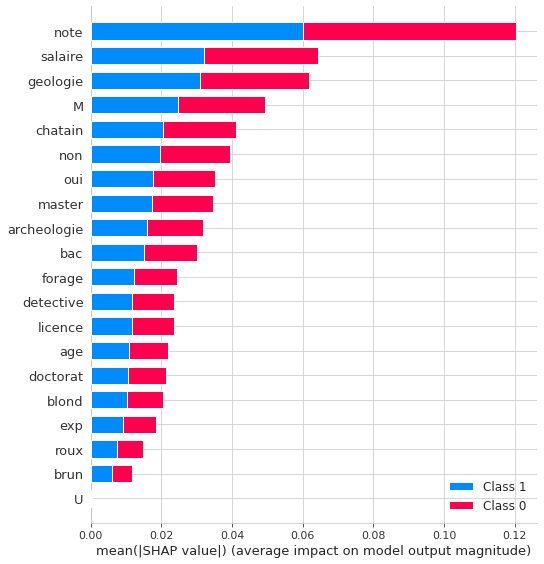

In [604]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

* This graphe(above) shows the order of importance of various features for the random forest model.To feature improve the ranforest model, we can drop the few least important features. 

## 2.4 Random Forest Model evaluation after feature selection
* based on the feature importance, we can re-evaluate the the model performance by droping some of least important features (e.g. let's drop the 3 last features U, brun and roux)

In [605]:
X.columns

Index(['age', 'exp', 'salaire', 'note', 'blond', 'brun', 'chatain', 'roux',
       'M', 'U', 'bac', 'doctorat', 'licence', 'master', 'archeologie',
       'detective', 'forage', 'geologie', 'non', 'oui'],
      dtype='object')

In [606]:
selected_feat1 =['age', 'exp', 'salaire', 'note', 'blond', 'brun', 'chatain', 'roux',
       'M','bac', 'doctorat', 'licence', 'master', 'archeologie',
       'detective', 'forage', 'geologie', 'non', 'oui']

In [607]:
X1 = X[selected_feat1]
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.33, random_state=0)

In [608]:
model_rf1=RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0,criterion = 'gini', max_features = 'auto', n_estimators= 100)
model_rf1.fit(X_train1,y_train1)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [609]:
y_train_pred_rf1=model_rf1.predict(X_train1)
y_val_pred_rf1=model_rf1.predict(X_val1)

In [610]:
print("confusion matrix for random forest training data:")
print(confusion_matrix(y_train1,y_train_pred_rf1))

confusion matrix for random forest training data:
[[10738  1113]
 [  263  1286]]


In [611]:
print("classification report random forest:")
print(classification_report(y_train1,y_train_pred_rf1))

classification report random forest:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11851
           1       0.54      0.83      0.65      1549

    accuracy                           0.90     13400
   macro avg       0.76      0.87      0.80     13400
weighted avg       0.93      0.90      0.91     13400



In [612]:
print("confusion matrix for random forest validation data:")
print(confusion_matrix(y_val1,y_val_pred_rf1))

confusion matrix for random forest validation data:
[[5266  591]
 [ 245  498]]


In [613]:
print("classification report random forest:")
print(classification_report(y_val1,y_val_pred_rf1))

classification report random forest:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5857
           1       0.46      0.67      0.54       743

    accuracy                           0.87      6600
   macro avg       0.71      0.78      0.74      6600
weighted avg       0.90      0.87      0.88      6600



In [614]:
rf_cross=cross_validate(model_rf,X1,y,scoring="accuracy")
print("Test accuracy on folds: ", rf_cross['test_score']*100, "%")
print("Average  test accuracy:" ,rf_cross['test_score'].mean()*100, "%")

Test accuracy on folds:  [87.125 87.275 88.2   87.675 87.35 ] %
Average  test accuracy: 87.52499999999999 %


# Conclusion: 
by removing the tree least important features, the random forest model still predicts the success and failure of application with an accuracy of around **88%**. Performing further hyperparameter tuning and playing with feature importance can potentially help improve the model performance beyond 88%.